# Credit Default Prediction (UCI Dataset)
Machine learning classification of credit card defaulters using Logistic Regression and Random Forest.

## Dataset
- Source: UCI Credit Card Dataset
- 30,000 credit card clients
- Target: `default.payment.next.month` (0 = paid, 1 = default)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_Credit_Card.csv')

In [22]:
# df.drop(columns=['ID'], inplace=True)  ← закомментировано, чтобы не вызывало ошибку
df.dropna(subset=['MARRIAGE'], inplace=True)

df['EDUCATION'] = df['EDUCATION'].replace({0: 'Other', 5: 'Other', 6: 'Other'})

## Label encoding and one-hot transformation

In [23]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Other'})
df['EDUCATION'] = df['EDUCATION'].replace({0: 'Other', 5: 'Other', 6: 'Other'})

df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [24]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression model and evaluation

In [26]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.8091666666666667
[[4531  142]
 [1003  324]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



## Random Forest model and evaluation

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8133333333333334
[[4402  271]
 [ 849  478]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



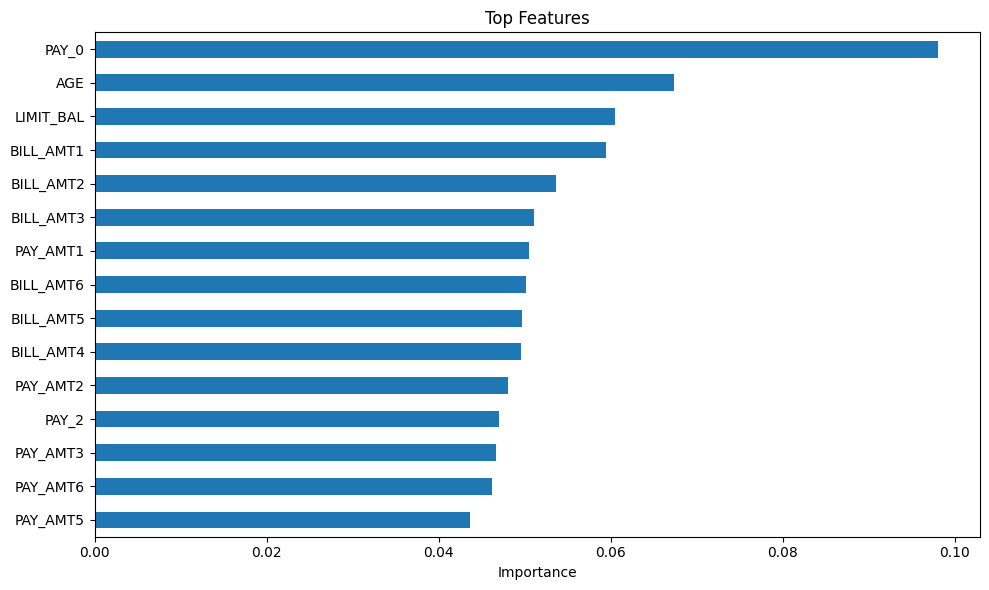

In [28]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,6))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top Features")
plt.tight_layout()
plt.show()

In [1]:
with open('requirements.txt', 'w') as f:
    f.write("""\
# Basic requirements file for credit default project
# These are the main libraries I used in the notebook

pandas
numpy
matplotlib
seaborn
scikit-learn
""")